In [96]:
import numpy as np
import cv2
import matplotlib
from matplotlib import pyplot as plt
%matplotlib inline


In [46]:
img=cv2.imread('./test_imgs/vk.jpg')
img.shape

(192, 192, 3)

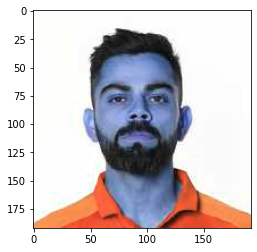

In [47]:
plt.imshow(img)

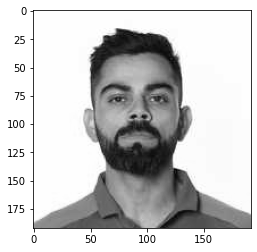

In [13]:
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
plt.imshow(gray,cmap='gray')

In [48]:
face_cascade= cv2.CascadeClassifier('./opencv/HaarCascad/haarcascade_frontalface_default.xml')
eye_cascade= cv2.CascadeClassifier('./opencv/HaarCascad/haarcascade_eye.xml')

faces= face_cascade.detectMultiScale(gray,1.3,5)
faces

array([[215,  63, 140, 140],
       [437,  78, 133, 133]])

In [49]:
(x,y,w,h)=faces[0]

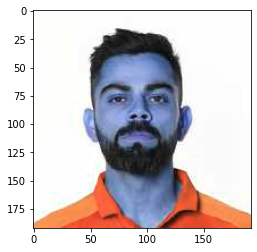

In [50]:
face_img = cv2.rectangle(img,(x,y), (x+w,y+h), (255,0,0),2)
plt.imshow(face_img)

In [51]:
eyes=eye_cascade.detectMultiScale(gray,1.3,5)
eyes

()

In [52]:
(x,y,w,h)=eyes[0]
(a,b,c,d)=eyes[1]

IndexError: tuple index out of range

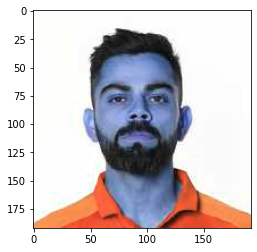

In [53]:
face_img = cv2.rectangle(face_img,(x,y), (x+w,y+h), (100,10,5),2)
plt.imshow(face_img)

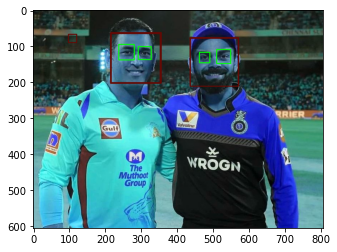

In [104]:
face_img = cv2.rectangle(face_img,(a,b), (a+c,b+d), (100,10,5),2)
plt.imshow(face_img)

In [55]:
def face_detect(img):
    face_cascade= cv2.CascadeClassifier('./opencv/HaarCascad/haarcascade_frontalface_default.xml')
    eye_cascade= cv2.CascadeClassifier('./opencv/HaarCascad/haarcascade_eye.xml')
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    faces= face_cascade.detectMultiScale(gray,1.3,5)
    
    
    for (x,y,w,h) in faces:
        face_img = cv2.rectangle(img,(x,y), (x+w,y+h), (100,10,5),2)
        eyes=eye_cascade.detectMultiScale(face_img,1.3,5)
        only_face=face_img[y:y+h , x:x+w]
        for (x,y,w,h) in eyes:
            face_img = cv2.rectangle(face_img,(x,y), (x+w,y+h), (0,255,5),2)
            
        
        plt.imshow(face_img)
        #plt.imshow(only_face) #Only face crop
        

        

In [56]:
face_detect(faces)

error: OpenCV(4.5.5) d:\a\opencv-python\opencv-python\opencv\modules\imgproc\src\color.simd_helpers.hpp:92: error: (-2:Unspecified error) in function '__cdecl cv::impl::`anonymous-namespace'::CvtHelper<struct cv::impl::`anonymous namespace'::Set<3,4,-1>,struct cv::impl::A0xa96199bf::Set<1,-1,-1>,struct cv::impl::A0xa96199bf::Set<0,2,5>,2>::CvtHelper(const class cv::_InputArray &,const class cv::_OutputArray &,int)'
> Invalid number of channels in input image:
>     'VScn::contains(scn)'
> where
>     'scn' is 1


In [57]:
img1=cv2.imread('./test_imgs/vk2.jpg')

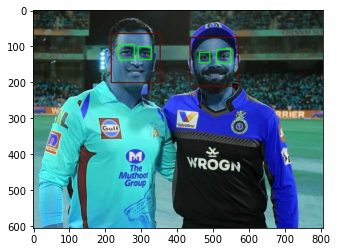

In [58]:
face_detect(img1)

In [59]:
face_cascade= cv2.CascadeClassifier('./opencv/HaarCascad/haarcascade_frontalface_default.xml')

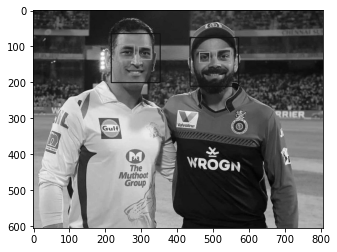

In [60]:
plt.imshow(img1)
gray = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)
plt.imshow(gray,cmap='gray')

In [61]:
faces= face_cascade.detectMultiScale(gray,1.3,5)

In [62]:
faces

array([[215,  63, 140, 140],
       [437,  78, 133, 133]])

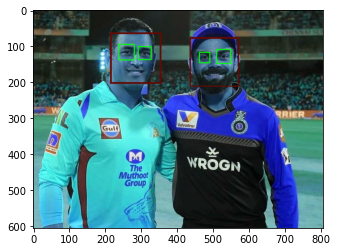

In [63]:
for (x,y,w,h) in faces:
    face_img = cv2.rectangle(img1,(x,y), (x+w,y+h), (100,10,5),2)
    eyes=eye_cascade.detectMultiScale(face_img,1.3,5)
        
    for (x,y,w,h) in eyes:
        face_img = cv2.rectangle(face_img,(x,y), (x+w,y+h), (100,10,5),2)
        
    plt.imshow(face_img)

#plt.figure()
#plt.imshow(face_img, cmap='gray')
#plt.show()

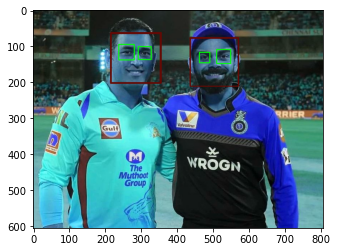

In [64]:
face_detect(img1)

In [72]:
def crop_img_if_two_eyes_detect(img_path):
    img=cv2.imread(img_path)
    try:
        gray_img=cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    except:
        print("Exception error"+img_path)
    
    #faces=face_cascade.detectMultiScale(gray,1.3,5)
    faces=face_cascade.detectMultiScale(gray_img,1.3,5)
    
    for (x,y,w,h) in faces:
        roi_gray= gray_img[y:y+h, x:x+w]
        roi_color = img[y:y+h, x:x+w]
        eyes=eye_cascade.detectMultiScale(roi_gray)
        if len(eyes) >=2:
            return roi_color
    

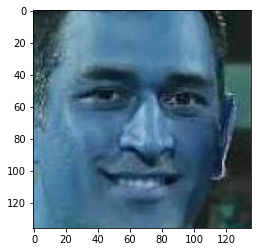

In [108]:
op_img=crop_img_if_two_eyes_detect('./test_imgs/vk2.jpg')
plt.imshow(op_img)

In [97]:
path_to_data='./dataset/'
path_to_cr_data='./dataset/cropped'

In [ ]:
#Below code get the name of the directories form the folder

In [98]:
import os
img_dirs=[]

for entry in os.scandir(path_to_data):
    if entry.is_dir():
        img_dirs.append(entry.path)

In [99]:
img_dirs

['./dataset/AveshKhan',
 './dataset/BhuvneshwarKumar',
 './dataset/DeepakHooda',
 './dataset/DineshKarthik',
 './dataset/HardikPandya',
 './dataset/JaspritBumrah',
 './dataset/KedarJadhav',
 './dataset/KLRahul',
 './dataset/KuldeepYadav',
 './dataset/MayankAgarwal',
 './dataset/MohammedShami',
 './dataset/MSDhoni',
 './dataset/RaviBishnoi',
 './dataset/RavindraJadeja',
 './dataset/RishabhPant',
 './dataset/RohitSharma',
 './dataset/ShardulThakur',
 './dataset/ShikharDhawan',
 './dataset/ViratKohli',
 './dataset/YuzvendraChahal']

In [ ]:
#Below code create folder on specific folder 

In [100]:
import shutil

if os.path.exists(path_to_cr_data):
    shutil.rmtree(path_to_cr_data)
os.mkdir(path_to_cr_data)

In [101]:
def get_cropped_image_if_2_eyes(image_path):
    img = cv2.imread(image_path)
    try:
        gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    except :
        print("Ecxeption occour"+ image_path)
    
    faces = face_cascade.detectMultiScale(gray, 1.3, 5)
    for (x,y,w,h) in faces:
        roi_gray = gray[y:y+h, x:x+w]
        roi_color = img[y:y+h, x:x+w]
        eyes = eye_cascade.detectMultiScale(roi_gray)
        if len(eyes) >= 2:
            return roi_color
        

In [103]:
cropped_image_dirs = []
celebrity_file_names_dict = {}

for img_dir in img_dirs:
    count = 1
    celebrity_name = img_dir.split('/')[-1]
    print(celebrity_name)
    
    celebrity_file_names_dict[celebrity_name] = []
    
    for entry in os.scandir(img_dir):
        roi_color = get_cropped_image_if_2_eyes(entry.path)
        if roi_color is not None:
            cropped_folder = path_to_cr_data +'/'+ celebrity_name
            if not os.path.exists(cropped_folder):
                os.makedirs(cropped_folder)
                cropped_image_dirs.append(cropped_folder)
                print("Generating cropped images in folder: ",cropped_folder)
                
            cropped_file_name = celebrity_name + str(count) + ".png"
            cropped_file_path = cropped_folder + "/" + cropped_file_name 
            
            cv2.imwrite(cropped_file_path, roi_color)
            celebrity_file_names_dict[celebrity_name].append(cropped_file_path)
            count += 1 

AveshKhan
Generating cropped images in folder:  ./dataset/cropped/AveshKhan
BhuvneshwarKumar
Generating cropped images in folder:  ./dataset/cropped/BhuvneshwarKumar
DeepakHooda
Generating cropped images in folder:  ./dataset/cropped/DeepakHooda
DineshKarthik
Generating cropped images in folder:  ./dataset/cropped/DineshKarthik
HardikPandya
Generating cropped images in folder:  ./dataset/cropped/HardikPandya
JaspritBumrah
Generating cropped images in folder:  ./dataset/cropped/JaspritBumrah
KedarJadhav
Generating cropped images in folder:  ./dataset/cropped/KedarJadhav
KLRahul
Generating cropped images in folder:  ./dataset/cropped/KLRahul
KuldeepYadav
Generating cropped images in folder:  ./dataset/cropped/KuldeepYadav
MayankAgarwal
Generating cropped images in folder:  ./dataset/cropped/MayankAgarwal
MohammedShami
Generating cropped images in folder:  ./dataset/cropped/MohammedShami
MSDhoni
Generating cropped images in folder:  ./dataset/cropped/MSDhoni
RaviBishnoi
Generating cropped

In [130]:
get_cropped_image_if_2_eyes('./dataset/KedarJadhav/M14_ CSK vs SRH – Kedar Jadhav Wicket.jpg')

error: OpenCV(4.5.5) D:\a\opencv-python\opencv-python\opencv\modules\imgproc\src\color.cpp:182: error: (-215:Assertion failed) !_src.empty() in function 'cv::cvtColor'


In [105]:
import numpy as np
import pywt
import cv2    

def w2d(face_img, mode='haar', level=1):
    imArray = face_img
    #Datatype conversions
    #convert to grayscale
    imArray = cv2.cvtColor( imArray,cv2.COLOR_RGB2GRAY )
    #convert to float
    imArray =  np.float32(imArray)   
    imArray /= 255;
    # compute coefficients 
    coeffs=pywt.wavedec2(imArray, mode, level=level)

    #Process Coefficients
    coeffs_H=list(coeffs)  
    coeffs_H[0] *= 0;  

    # reconstruction
    imArray_H=pywt.waverec2(coeffs_H, mode);
    imArray_H *= 255;
    imArray_H =  np.uint8(imArray_H)

    return imArray_H

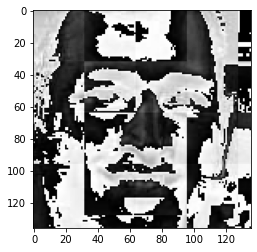

In [109]:
im_har = w2d(op_img,'db1',5)
plt.imshow(im_har, cmap='gray')

In [110]:
celebrity_file_names_dict

{'AveshKhan': ['./dataset/cropped/AveshKhan/AveshKhan1.png',
  './dataset/cropped/AveshKhan/AveshKhan2.png',
  './dataset/cropped/AveshKhan/AveshKhan3.png',
  './dataset/cropped/AveshKhan/AveshKhan4.png',
  './dataset/cropped/AveshKhan/AveshKhan5.png',
  './dataset/cropped/AveshKhan/AveshKhan6.png',
  './dataset/cropped/AveshKhan/AveshKhan7.png',
  './dataset/cropped/AveshKhan/AveshKhan8.png',
  './dataset/cropped/AveshKhan/AveshKhan9.png',
  './dataset/cropped/AveshKhan/AveshKhan10.png',
  './dataset/cropped/AveshKhan/AveshKhan11.png',
  './dataset/cropped/AveshKhan/AveshKhan12.png'],
 'BhuvneshwarKumar': ['./dataset/cropped/BhuvneshwarKumar/BhuvneshwarKumar1.png',
  './dataset/cropped/BhuvneshwarKumar/BhuvneshwarKumar2.png',
  './dataset/cropped/BhuvneshwarKumar/BhuvneshwarKumar3.png',
  './dataset/cropped/BhuvneshwarKumar/BhuvneshwarKumar4.png',
  './dataset/cropped/BhuvneshwarKumar/BhuvneshwarKumar5.png',
  './dataset/cropped/BhuvneshwarKumar/BhuvneshwarKumar6.png',
  './dataset/cr

In [114]:
class_dict={}
count=0
for cricketer_name in celebrity_file_names_dict.keys():
    class_dict[cricketer_name] = count
    count = count+1
class_dict

{'AveshKhan': 0,
 'BhuvneshwarKumar': 1,
 'DeepakHooda': 2,
 'DineshKarthik': 3,
 'HardikPandya': 4,
 'JaspritBumrah': 5,
 'KedarJadhav': 6,
 'KLRahul': 7,
 'KuldeepYadav': 8,
 'MayankAgarwal': 9,
 'MohammedShami': 10,
 'MSDhoni': 11,
 'RaviBishnoi': 12,
 'RavindraJadeja': 13,
 'RishabhPant': 14,
 'RohitSharma': 15,
 'ShardulThakur': 16,
 'ShikharDhawan': 17,
 'ViratKohli': 18,
 'YuzvendraChahal': 19}

In [117]:
X=[]
y=[]

for cricketer_name, training_file in celebrity_file_names_dict.items():
    #here we read crickter name and list of belonging images
    for training_image in training_file:
        #here we read individual image belongs to crickter
        img=cv2.imread(training_image)
        #if img is return none , still we have to continue without fail
        if img is None:
            continue
        
        #Now we are scalling bcz we have diffrent diffrent size of images
        scalled_raw_img = cv2.resize(img, (32,32))
        #Using above function we get wavelet transform img
        img_har=w2d(img,'db1',5)
        #Now we need to scale that img as well
        scalled_img_haar = cv2.resize(img_har, (32,32))
        #Now we have to vertically stack them and numpy havefunction for them
        combine_img =np.vstack((scalled_raw_img.reshape(32*32*3,1), scalled_img_haar.reshape(32*32,1)))
        
        X.append(combine_img)
        y.append(class_dict[cricketer_name])

In [119]:
len(X[0])

4096

In [120]:
#We are converting this to float and reshape it just to make sure this img number make as float so that when we train model it will helpful
X= np.array(X).reshape(len(X),4096).astype(float)
X.shape

(356, 4096)

In [121]:
celebrity_file_names_dict = {}
for img_dir in cropped_image_dirs:
    celebrity_name = img_dir.split('/')[-1]
    file_list = []
    for entry in os.scandir(img_dir):
        file_list.append(entry.path)
    celebrity_file_names_dict[celebrity_name] = file_list
celebrity_file_names_dict

{'AveshKhan': ['./dataset/cropped/AveshKhan\\AveshKhan1.png',
  './dataset/cropped/AveshKhan\\AveshKhan10.png',
  './dataset/cropped/AveshKhan\\AveshKhan11.png',
  './dataset/cropped/AveshKhan\\AveshKhan12.png',
  './dataset/cropped/AveshKhan\\AveshKhan2.png',
  './dataset/cropped/AveshKhan\\AveshKhan3.png',
  './dataset/cropped/AveshKhan\\AveshKhan4.png',
  './dataset/cropped/AveshKhan\\AveshKhan5.png',
  './dataset/cropped/AveshKhan\\AveshKhan6.png',
  './dataset/cropped/AveshKhan\\AveshKhan7.png',
  './dataset/cropped/AveshKhan\\AveshKhan8.png',
  './dataset/cropped/AveshKhan\\AveshKhan9.png'],
 'BhuvneshwarKumar': ['./dataset/cropped/BhuvneshwarKumar\\BhuvneshwarKumar1.png',
  './dataset/cropped/BhuvneshwarKumar\\BhuvneshwarKumar10.png',
  './dataset/cropped/BhuvneshwarKumar\\BhuvneshwarKumar11.png',
  './dataset/cropped/BhuvneshwarKumar\\BhuvneshwarKumar12.png',
  './dataset/cropped/BhuvneshwarKumar\\BhuvneshwarKumar13.png',
  './dataset/cropped/BhuvneshwarKumar\\BhuvneshwarKumar1

In [ ]:
#We use Support Vector Machine SVM it perform Well when we are taking about Classification

In [122]:
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report

In [126]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

pipe = Pipeline([('scaler', StandardScaler()), ('svc', SVC(kernel = 'rbf', C = 10))])
pipe.fit(X_train, y_train)
pipe.score(X_test, y_test)

0.25842696629213485

In [127]:
print(classification_report(y_test, pipe.predict(X_test)))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         2
           1       0.24      0.67      0.35         6
           2       0.00      0.00      0.00         2
           3       0.00      0.00      0.00         9
           4       1.00      0.25      0.40         4
           5       0.00      0.00      0.00         3
           6       0.00      0.00      0.00         4
           7       0.50      0.40      0.44         5
           8       0.33      0.33      0.33         6
           9       0.00      0.00      0.00         5
          10       0.67      0.50      0.57         4
          11       0.00      0.00      0.00         2
          12       0.67      0.50      0.57         8
          13       0.25      0.33      0.29         6
          14       0.00      0.00      0.00         3
          15       0.00      0.00      0.00         5
          16       0.31      0.67      0.42         6
          17       1.00    

C:\Users\91840\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\91840\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\91840\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [128]:
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import GridSearchCV

In [129]:
model_params = {
    'svm': {
        'model': svm.SVC(gamma='auto',probability=True),
        'params' : {
            'svc__C': [1,10,100,1000],
            'svc__kernel': ['rbf','linear']
        }  
    },
    'random_forest': {
        'model': RandomForestClassifier(),
        'params' : {
            'randomforestclassifier__n_estimators': [1,5,10]
        }
    },
    'logistic_regression' : {
        'model': LogisticRegression(solver='liblinear',multi_class='auto'),
        'params': {
            'logisticregression__C': [1,5,10]
        }
    }
}

In [130]:
scores = []
best_estimators = {}
import pandas as pd
for algo, mp in model_params.items():
    pipe = make_pipeline(StandardScaler(), mp['model'])
    clf =  GridSearchCV(pipe, mp['params'], cv=5, return_train_score=False)
    clf.fit(X_train, y_train)
    scores.append({
        'model': algo,
        'best_score': clf.best_score_,
        'best_params': clf.best_params_
    })
    best_estimators[algo] = clf.best_estimator_
    
df = pd.DataFrame(scores,columns=['model','best_score','best_params'])
df

,model,best_score,best_params
0,svm,0.366737,"{'svc__C': 1, 'svc__kernel': 'linear'}"
1,random_forest,0.190915,{'randomforestclassifier__n_estimators': 10}
2,logistic_regression,0.471908,{'logisticregression__C': 1}


In [132]:
best_estimators['logistic_regression'].score(X_test, y_test)

0.4044943820224719

In [133]:
best_estimators['svm'].score(X_test, y_test)

0.3258426966292135

In [134]:
#Now we decided to use Logistic regression so we stoting it 

best_clf= best_estimators['logistic_regression']

In [135]:
#We use confusion matrix will tell how many times it detect proper results 
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, best_clf.predict(X_test))
cm

array([[0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0],
       [0, 5, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0],
       [0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0],
       [0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0],
       [0, 1, 1, 0, 0, 0, 1, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 4, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 6, 0, 0, 0, 1, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 4, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 1,

Text(69.0, 0.5, 'Truth')

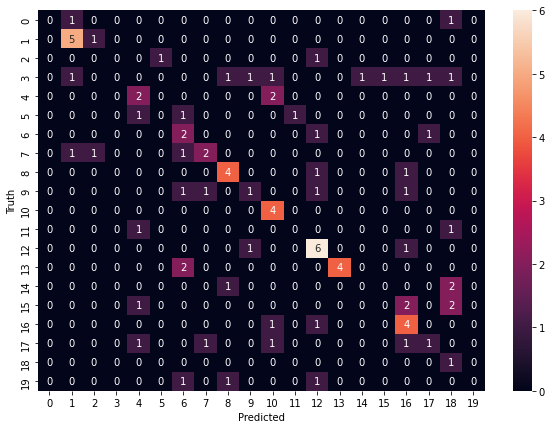

In [136]:
import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [138]:
!pip install joblib
import joblib 
# Save the model as a pickle in a file 
joblib.dump(best_clf, 'E:\Data Scientist\TeamClassifier\model\saved_model.pkl')


['E:\\Data Scientist\\TeamClassifier\\model\\saved_model.pkl']

In [139]:
import json
with open("E:\Data Scientist\TeamClassifier\model\class_dictionary.json","w") as f:
    f.write(json.dumps(class_dict))